# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
checkpoints = r'C:\Users\Talha Ali\Desktop\machine learning labslab 12\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [ ]:
train_dir = r'C:\Users\Talha Ali\Desktop\machine learning labs\LAB 11\U\dataset\train'
validation_dir = r'C:\Users\Talha AliDesktop\machine learning labs\LAB 11\dataset\validation'
test_dir = r'C:\Users\Talha Ali\Desktop\machine learning labs\LAB 11\dataset\test'

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [19]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [21]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.3776 - loss: 1.2915
Epoch 1: val_loss improved from inf to 0.65485, saving model to C:\Users\PMLS\ml\lab 12\\E1-cp-0001-loss0.65.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.3801 - loss: 1.2879 - val_acc: 0.7421 - val_loss: 0.6549
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6873 - loss: 0.7249
Epoch 2: val_loss improved from 0.65485 to 0.50660, saving model to C:\Users\PMLS\ml\lab 12\\E1-cp-0002-loss0.51.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - acc: 0.6881 - loss: 0.7235 - val_acc: 0.7857 - val_loss: 0.5066
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7626 - loss: 0.5317
Epoch 3: val_loss did not improve from 0.50660
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - acc: 0.7627 - loss: 0.5315 - val_acc: 0.5635 - val_loss: 0.9437
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7892 - loss: 0.4555
Epoch 4: val_loss did not improve from 0.50660
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.7893 - loss: 0.4554 - val_acc: 0.6984 - val_loss: 0.7428
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8181 - loss: 0.4176
Epoch 5: val_loss improved from 0.50660 to 0.33891, saving model to C:\Users\PMLS\ml\lab 12\\E1-cp-0005-loss0.34.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.8182 - loss: 0.4172 - val_acc: 0.8294 - val_loss: 0.3389
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8355 - loss: 0.3538
Epoch 6: val_loss did not improve from 0.33891
50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.8353 - loss: 0.3542 - val_acc: 0.8175 - val_loss: 0.3848
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8520 - loss: 0.3432
Epoch 7: val_loss did not improve from 0.33891
50/50 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - acc: 0.8521 - loss: 0.3428 - val_acc: 0.8095 - val_loss: 0.3785
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8666 - loss: 0.3007
Epoch 8: val_loss improved from 0.33891 to 0.28987, saving model to C:\Users\PMLS\ml\lab 12\\E1-cp-0008-loss0.29.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - acc: 0.8666 - loss: 0.3006 - val_acc: 0.8690 - val_loss: 0.2899
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8684 - loss: 0.2849
Epoch 9: val_loss improved from 0.28987 to 0.28140, saving model to C:\Users\PMLS\ml\lab 12\\E1-cp-0009-loss0.28.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - acc: 0.8685 - loss: 0.2849 - val_acc: 0.8571 - val_loss: 0.2814
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8995 - loss: 0.2404
Epoch 10: val_loss did not improve from 0.28140
50/50 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - acc: 0.8994 - loss: 0.2405 - val_acc: 0.8333 - val_loss: 0.2911


In [23]:
model_history.history

{'acc': [0.503125011920929,
  0.7250000238418579,
  0.7693750262260437,
  0.796875,
  0.8243749737739563,
  0.8256250023841858,
  0.8587499856948853,
  0.8656250238418579,
  0.875,
  0.8962500095367432],
 'loss': [1.1092047691345215,
  0.6566142439842224,
  0.5213443636894226,
  0.447378933429718,
  0.39558032155036926,
  0.3737829923629761,
  0.3228202164173126,
  0.298926442861557,
  0.2812562882900238,
  0.24330297112464905],
 'val_acc': [0.7420634627342224,
  0.7857142686843872,
  0.5634920597076416,
  0.6984127163887024,
  0.829365074634552,
  0.817460298538208,
  0.8095238208770752,
  0.8690476417541504,
  0.8571428656578064,
  0.8333333134651184],
 'val_loss': [0.6548509001731873,
  0.5066022872924805,
  0.943736732006073,
  0.7427528500556946,
  0.3389137387275696,
  0.3848397135734558,
  0.378519207239151,
  0.2898748517036438,
  0.28139930963516235,
  0.2910851836204529]}

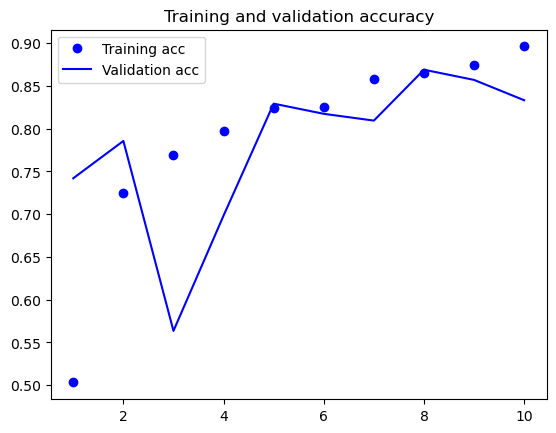

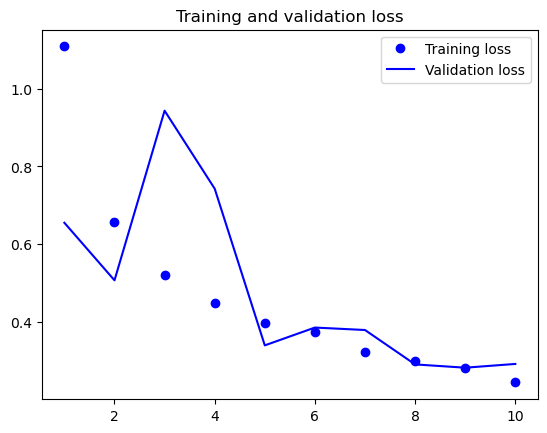

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Talha Ali\Desktop\machine learning labs\lab 12\model_Accuracy.png')

In [ ]:
model.save(r'C:\Users\Talha Ali\Desktop\machine learning labs\lab 12\E1-cp-0010-loss0.27.h5')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step


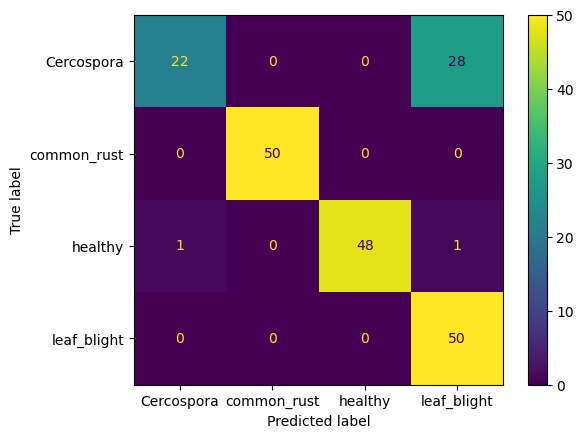

In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()


In [31]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.96      0.44      0.60        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      0.96      0.98        50
 leaf_blight       0.63      1.00      0.78        50

    accuracy                           0.85       200
   macro avg       0.90      0.85      0.84       200
weighted avg       0.90      0.85      0.84       200

